In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, recall_score, precision_score, accuracy_score)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Mounted at /content/gdrive


#**Machine Learning Final Project**

#Stroke

Stroke is the second leading cause of death in the world. This project attempts to help predict the chances of having a stroke based on an array of 12 variables. The variables are as follows: 

*   id: unique identifier
*   gender: "Male", "Female" or "Other"
*   age: age of the patient
*   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*   ever_married: "No" or "Yes"
*   work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*   Residence_type: "Rural" or "Urban"
*   avg_glucose_level: average glucose level in blood
*   bmi: body mass index
*   smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"


This project begins with exploratory data analysis where the data is analyzed and edited. The next step is the splitting of the data. Finally, the last step of the project is to run four different ensemble methods and test for their accuracy to determine which is the most effective. 

##Exploratory Data Analysis and Prepping of the Data

In [2]:
df = pd.read_csv('/content/gdrive/My Drive/healthcare-dataset-stroke-data.csv')

In [3]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [4]:
df = df.drop('id', axis=1)

Text(0, 0.5, 'Count')

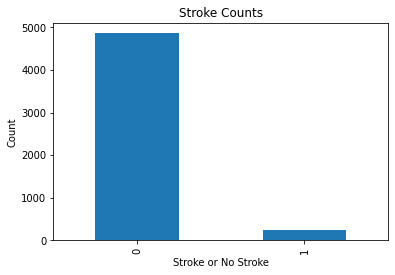

In [5]:
df['stroke'].value_counts(dropna = False).plot.bar()
plt.title('Stroke Counts')
plt.xlabel('Stroke or No Stroke')
plt.ylabel('Count')

This visualization shows the counts of people that have had a stroke and those that have not. The vast majority of people in the data set have not had a stroke. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


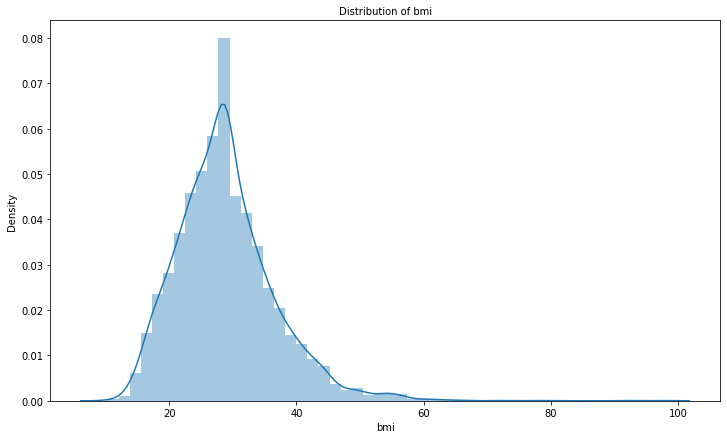

In [6]:
plt.subplots(figsize=(12,7))
sns.distplot(df['bmi'])
plt.title('Distribution of bmi', fontsize = 10)
plt.show()

This visualization shows the distribution of BMI levels for the data set. The highest concentration of data seems to be around a BMI of 30 and the data is skewed right. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


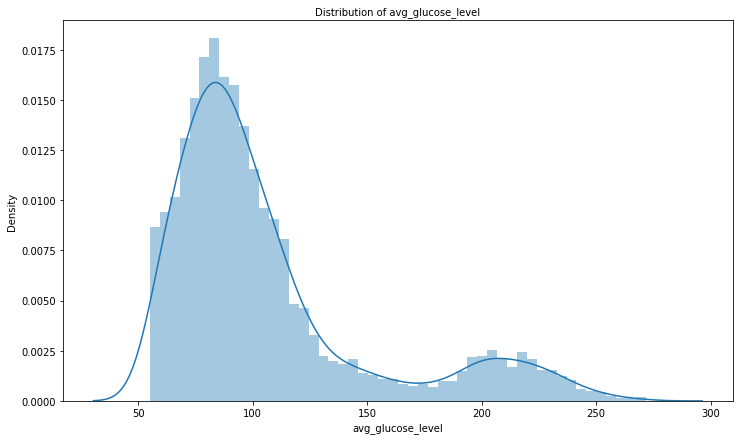

In [7]:
plt.subplots(figsize=(12,7))
sns.distplot(df['avg_glucose_level'])
plt.title('Distribution of avg_glucose_level', fontsize = 10)
plt.show()

This distribution plot shows the distribution of average glucose levels among the data set. The highest concentration of people is around an average glucose level of 80 and h=the data is skewed right. 

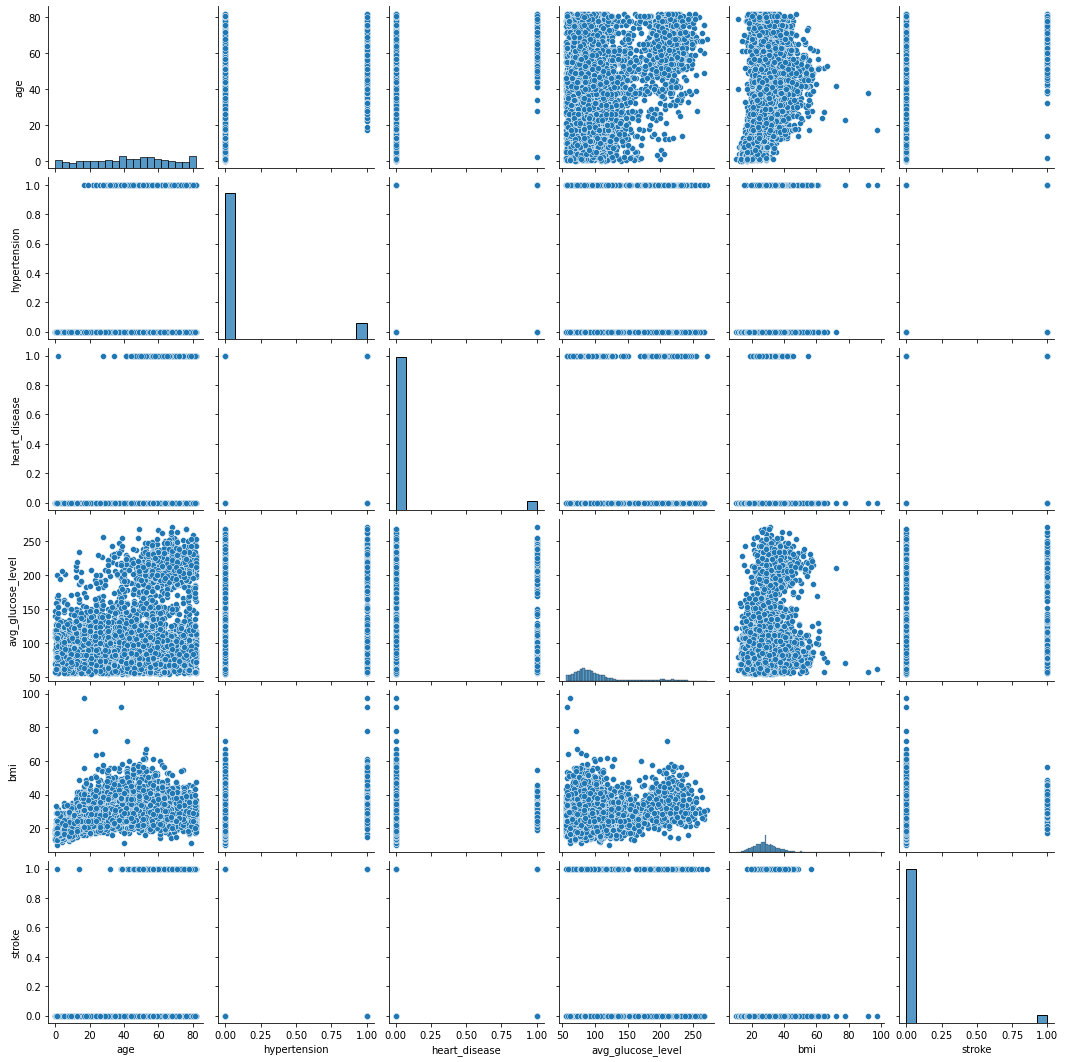

In [8]:
sns.pairplot(df)

This pairplot gives a broad overview of all the trends in the data set. 

In [ ]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [ ]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

#Splitting of Data

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.9510763209393346


#Bagging Model

In [ ]:
# Bagging
model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.9478147423352903


#Random Forest Model

In [ ]:
# Random Forest
model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('Testing Accuracy:\t\t', acc_oob)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)


Testing Accuracy:		 0.9491
OOB Score:			 0.9486
Testing Accuracy:		 0.9491
Acc. Difference:		 0.0005


#Boosting Model

In [ ]:
# Boosting
base_est = DecisionTreeClassifier (max_depth =4)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, ada_boost1.predict(X_test)))

feature_importances = ada_boost1.feature_importances_
features = X_train.columns
data = pd.DataFrame({"features": features, "importance": feature_importances})
data1 = data.sort_values(by='importance', ascending=False)
print("Top 3 most important features of model: \n", data1.head(3))

Accuracy:  0.9510763209393346
Top 3 most important features of model: 
             features  importance
7  avg_glucose_level    0.328129
8                bmi    0.264916
1                age    0.214906


#Voting Ensemble

In [ ]:
rfClf = RandomForestClassifier(n_estimators=200)
svmClf = SVC(probability=True)
logClf = LogisticRegression()

decisionTree = DecisionTreeClassifier(max_depth=4)
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf), ("dtClf", decisionTree)], voting='soft')
clf2.fit(X_train, y_train)
clf2_pred = clf2.predict(X_test)

print('Accuracy score', accuracy_score(y_test, clf2_pred))

Accuracy score 0.9510763209393346


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Model Performance

In [ ]:
#Bagging
print('Bagging: ', acc_bagging)

#RandomForest
print('Randomforest:', acc_oob)

#Boosting
print('Boosting:', accuracy_score(y_test, ada_boost1.predict(X_test)))

#Voting
print('Voting:', accuracy_score(y_test,clf2_pred))

print('The boosting and voting models both have the best accuracy')

Bagging:  0.9478147423352903
Randomforest: 0.9491
Boosting: 0.9510763209393346
Voting: 0.9510763209393346
The boosting and voting models both have the best accuracy


#Conclusion

Both the boosting and the voting models have the highest level of accuracy tied at .9511. Both of these models are effective in predicting the target variable. 